### Treshold Value

- During binary classification like Logistic Regression, if we get the output probabilty above 0.5, then it is considered as 1 and if the output probability is below 0.5 it is considerd as 0.
- This 0.5 is the Treshold value. Based on our problem statement and our dataset, we can also change the treshold Value.
- We come to know what is the best treshold value using ROC curve.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification # This library is used to create a new dataset.

In [3]:
from sklearn.model_selection import train_test_split
X,y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

# n_samples = number of rows
# n_classes = number of output classes (2 - Binary classification)
# weights = 1,1 means balanced dataset. Equal number of 0 and 1 in the output

In [4]:
X.shape, y.shape

((2000, 20), (2000,))

In [9]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Random Forest

In [11]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.9999999999999999
RF test roc-auc: 0.9806444444444444


- Here, we are predicting on the training data (X_train) itself. Hence the first accuracy is very high
- We have used predict_proba. Hence it will give 2 colums. Probability of 0 and Probability of 1
- We have chosen any one probability for ROC AUC score

In [12]:
ytrain_pred

array([[0.99, 0.01],
       [0.99, 0.01],
       [0.02, 0.98],
       ...,
       [0.99, 0.01],
       [0.98, 0.02],
       [0.3 , 0.7 ]])

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


### AdaBoost Classifier 

In [14]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


### KNN Classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


### Now we will Focus of Best Treshold to get the Maximum Accuracy

- By default, the treshold value is selected as 0.5
- We have to get the best treshold value for maximum accuracy

In [16]:
# We will be combining all the 4 models that we have previously created

pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1])) # here, we are column wise appending probabilities of any one class (0 or 1) for X_test for all the 4 models
final_prediction=pd.concat(pred,axis=1).mean(axis=1) # We are creating a new dataset which takes row wise average of all the probabilities
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9847444444444444


In [17]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.96,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.96,0.966929,0.538202,0.8
3,0.95,0.761539,0.509875,0.8
4,0.61,0.779443,0.490344,0.4
5,0.27,0.544222,0.492548,0.6
6,0.96,0.977857,0.537171,1.0
7,0.91,0.960771,0.552570,0.8
8,0.98,0.993640,0.537610,1.0
9,0.66,0.505748,0.510507,0.6


In [18]:
final_prediction

0      0.877762
1      0.118323
2      0.816283
3      0.755353
4      0.569947
5      0.476693
6      0.868757
7      0.805835
8      0.877812
9      0.569064
10     0.688937
11     0.678977
12     0.195984
13     0.828790
14     0.852536
15     0.135514
16     0.167578
17     0.117468
18     0.115590
19     0.125670
20     0.891814
21     0.541393
22     0.767352
23     0.800371
24     0.122429
25     0.831257
26     0.144014
27     0.740531
28     0.732298
29     0.445449
         ...   
570    0.882339
571    0.121033
572    0.758032
573    0.321103
574    0.117968
575    0.813894
576    0.199165
577    0.128098
578    0.430143
579    0.119125
580    0.578004
581    0.191058
582    0.188754
583    0.120190
584    0.380687
585    0.826613
586    0.167087
587    0.896003
588    0.122144
589    0.269699
590    0.596143
591    0.171731
592    0.113518
593    0.221047
594    0.119466
595    0.123840
596    0.112845
597    0.874197
598    0.168217
599    0.837357
Length: 600, dtype: floa

In [19]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91174686, 0.91174686, 0.90623256, 0.90577475, 0.80056516,
       0.8005558 , 0.79381489, 0.79162833, 0.78877646, 0.78821156,
       0.77047605, 0.76787124, 0.74391018, 0.74387362, 0.69294088,
       0.68893711, 0.67268151, 0.67243537, 0.60988185, 0.58736186,
       0.5790152 , 0.57800386, 0.55792732, 0.55719563, 0.55149047,
       0.54139283, 0.52605932, 0.49866892, 0.4471034 , 0.39475652,
       0.38129719, 0.35268074, 0.34836612, 0.23719741, 0.23396893,
       0.19782943, 0.19598417, 0.12545384, 0.1253351 , 0.10695344])

In [20]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
28,0.447103,0.961667
27,0.498669,0.958333
26,0.526059,0.958333
25,0.541393,0.958333
24,0.551490,0.956667


### We can see that Treshold Value of 0.447103 gives the highest Accuracy. Hence that Treshold will be Selected

In [21]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

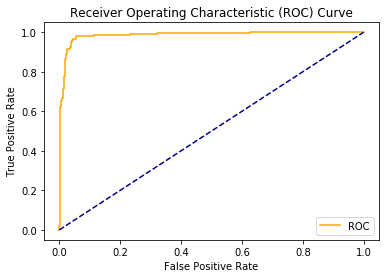

In [22]:
plot_roc_curve(fpr,tpr)